In [ ]:
'''
Problem Statement:-Linear regression by using Deep Neural network:
Implement Boston housing price prediction problem by Linear regression 
using Deep Neural network. Use Boston House price prediction dataset.
'''

'\nProblem Statement:-Linear regression by using Deep Neural network:\nImplement Boston housing price prediction problem by Linear regression \nusing Deep Neural network. Use Boston House price prediction dataset.\n'

In [ ]:
# Import Libraries
from sklearn import datasets
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
#ignore warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [ ]:
# read data from sklearn data set
df=pd.read_csv("Boston.csv")
#df=pd.DataFrame(data.data,columns=data.feature_names)
#df['price']=data.target.
df.rename(columns = {'medv':'price'}, inplace = True)
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  price       506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
price         0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.shape

(506, 15)

<Axes: >

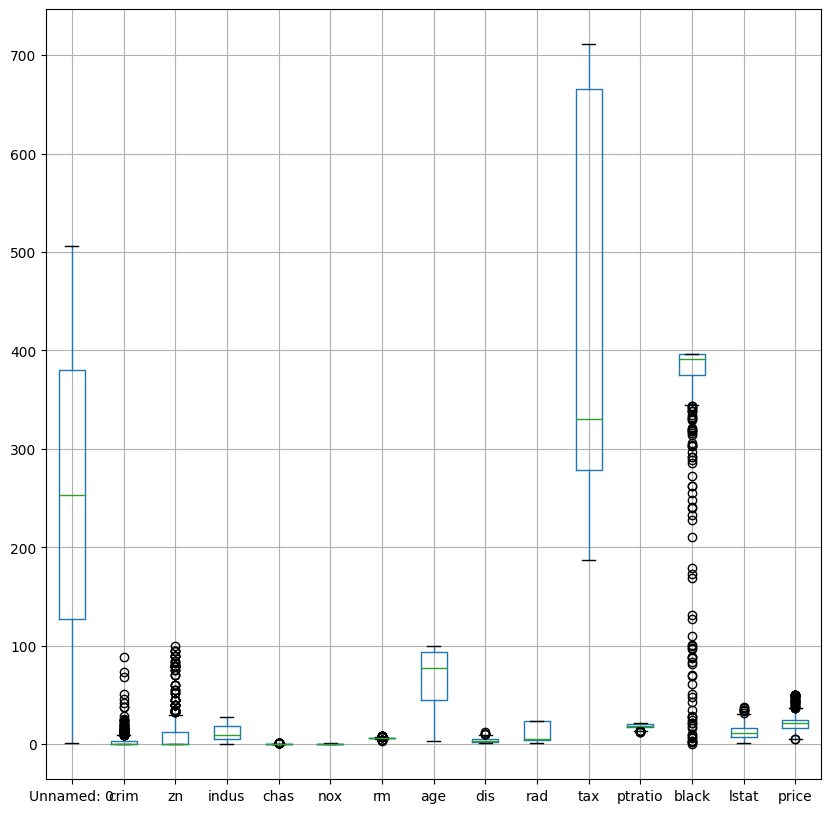

In [ ]:
#univariate EDA
fig=plt.figure(figsize=(10,10))
df.boxplot()



<Axes: >

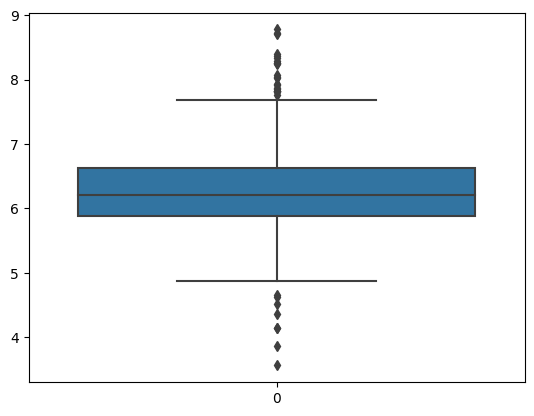

In [ ]:
sns.boxplot(df["rm"])

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <BarContainer object of 10 artists>)

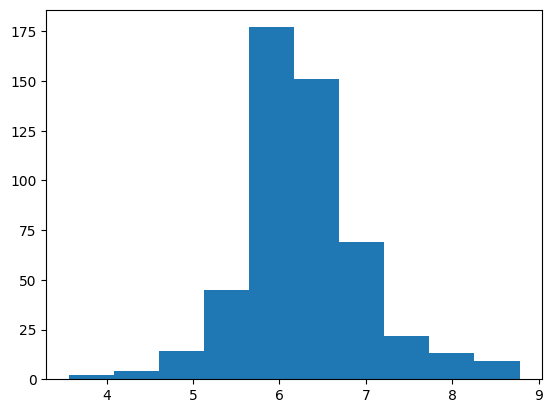

In [ ]:
plt.hist(df["rm"])

In [ ]:
df["rm"].value_counts()

5.713    3
6.167    3
6.127    3
6.229    3
6.405    3
        ..
5.859    1
6.416    1
5.572    1
5.880    1
6.976    1
Name: rm, Length: 446, dtype: int64

<Axes: xlabel='lstat', ylabel='price'>

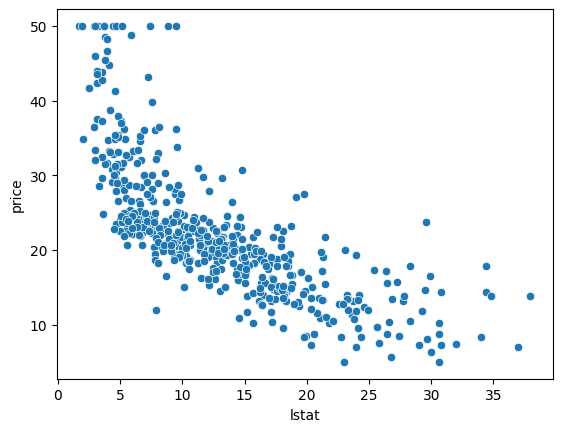

In [ ]:
#bivariate EDA
sns.scatterplot(x= df["lstat"],y = df["price"])

<Axes: xlabel='rm', ylabel='price'>

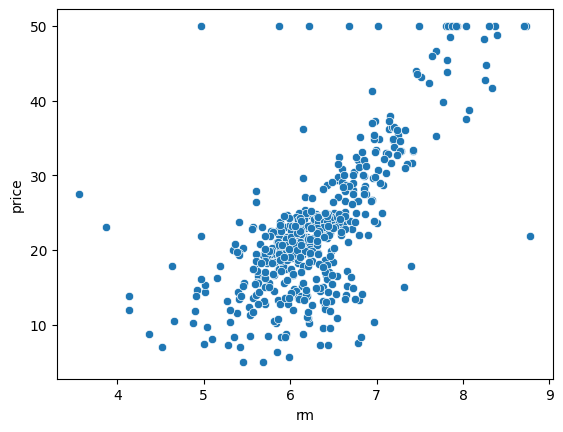

In [ ]:
sns.scatterplot(x= df["rm"],y = df["price"])

<Axes: >

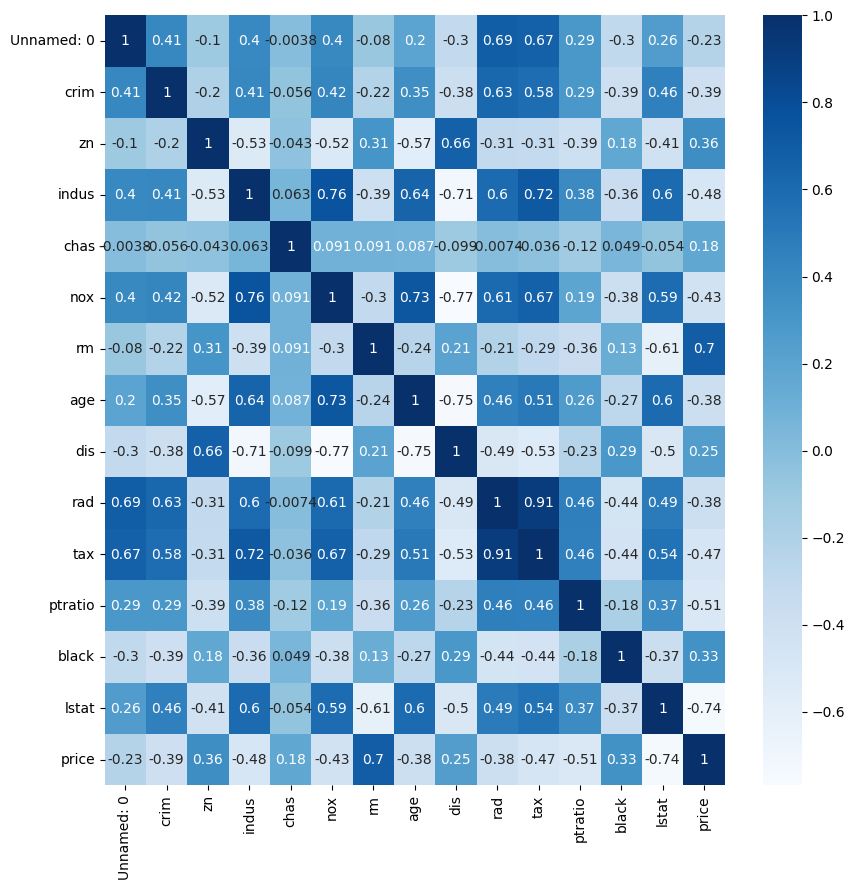

In [ ]:
#Multivariate EDA
fig= plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [ ]:
pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow.keras as tk

In [ ]:
model=tk.Sequential()

In [ ]:
#adding input layer
model.add(tk.layers.Input(shape=(14,)))

In [ ]:
#adding first hidden layer
model.add(tk.layers.Dense(units=6,activation="relu",kernel_initializer="he_uniform"))


In [ ]:
#adding second hidden layer
model.add(tk.layers.Dense(units=6,activation="relu",kernel_initializer="he_uniform"))

In [ ]:
#adding output layer
model.add(tk.layers.Dense(units=6,activation="relu",kernel_initializer="he_uniform"))

In [ ]:
#compiling the model
model.compile(optimizer="adam",loss="mean_squared_error",metrics="accuracy")

In [ ]:
#compiling the model
model.compile(optimizer="adam",loss="mean_absolute_error")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 90        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
Total params: 174
Trainable params: 174
Non-trainable params: 0
_________________________________________________________________


In [ ]:
df.head()
x=df.iloc[:,:-1]
display(x)
y=df['price']
display(y)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
#training the model
import time
start=time.time()
obj1=model.fit(x=xtrain,y=ytrain,epochs=50,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/50
7/7 [==============================] - 6s 33ms/step - loss: 103.6308 - val_loss: 93.1272
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 92.2985 - val_loss: 82.9752
Epoch 3/50
7/7 [==============================] - 0s 11ms/step - loss: 82.1565 - val_loss: 73.8971
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 73.1745 - val_loss: 65.7412
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 65.1986 - val_loss: 58.3895
Epoch 6/50
7/7 [==============================] - 0s 13ms/step - loss: 58.0547 - val_loss: 51.7886
Epoch 7/50
7/7 [==============================] - 0s 12ms/step - loss: 51.6007 - val_loss: 45.7151
Epoch 8/50
7/7 [==============================] - 0s 13ms/step - loss: 45.6755 - val_loss: 40.5532
Epoch 9/50
7/7 [==============================] - 0s 12ms/step - loss: 40.4858 - val_loss: 36.1368
Epoch 10/50
7/7 [==============================] - 0s 12ms/step - loss: 35.9472 - val_loss: 32.4171
Epoch 11